In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('votes_clean.csv')

In [3]:
data.head()

,Unnamed: 0,place_id_left,place_id_right,study_id,left,right,voter_uniqueid,choice,study_question,place_name_right,place_name_left,day,time,long_right,lat_right,long_left,lat_left
0,1,50e5e9c1d7c3df413b000000,50f38e44fdc9f065f0000855,50f62cb7a84ea7c5fdd2e458,513d573bfdc9f03587003120,50f5eb3ffdc9f065f00080f7,7681bc0ade864091a957524067c9254f,left,wealthier,Rio De Janeiro,Amsterdam,2014-04-20,21:17:31,-22.779996,-43.403705,52.382016,4.861142
1,2,50e5e9c1d7c3df413b000000,50f39092fdc9f065f000097d,5217c351ad93a7d3e7b07a64,513d57f9fdc9f0358700326b,50f5e700fdc9f065f0006ef0,e5939a746d544ce09c04d6453a5a1a3a,left,more beautiful,Sao Paulo,Amsterdam,2013-09-01,03:22:19,-23.638028,-46.601966,52.325979,4.880425
2,3,50e5e9c1d7c3df413b000000,50e734e9d7c3df413b000ebf,50f62c41a84ea7c5fdd2e454,513d57e5fdc9f03587003244,513d7b54fdc9f03587006b19,32c3fe6369814f398dee39f3a68daa4f,right,livelier,Atlanta,Amsterdam,2017-10-02,01:40:35,33.895489,-84.282779,52.358512,4.943212
3,4,50e5e9c1d7c3df413b000000,50f39436fdc9f065f0000acc,50f62ccfa84ea7c5fdd2e459,513d57bdfdc9f035870031fd,50f562e3fdc9f065f0005b45,90dc7520a28f4c58a090d14ec58cb181,equal,more depressing,Singapore,Amsterdam,2013-12-29,16:34:34,1.343338,103.961166,52.332149,4.861824
4,5,50e5e9c1d7c3df413b000000,50f38aaefdc9f065f0000562,50f62c41a84ea7c5fdd2e454,513d56fefdc9f035870030ad,50f61675beb2fed9100008bb,b06240448e62439194a30171f2d84091,right,livelier,Philadelphia,Amsterdam,2016-05-03,13:20:42,40.022366,-75.143560,52.308278,4.977296


In [4]:
len(data)

1565723

In [5]:
data.columns

Index(['Unnamed: 0', 'place_id_left', 'place_id_right', 'study_id', 'left',
       'right', 'voter_uniqueid', 'choice', 'study_question',
       'place_name_right', 'place_name_left', 'day', 'time', 'long_right',
       'lat_right', 'long_left', 'lat_left'],
      dtype='object')

In [6]:
#返回一个列所有的取值
data['study_question'].unique()

array(['wealthier', 'more beautiful', 'livelier', 'more depressing',
       'safer', 'more boring', nan], dtype=object)

In [7]:
data['study_question'].value_counts()

study_question
safer              509961
livelier           366802
more beautiful     220604
wealthier          174758
more depressing    149355
more boring        144060
Name: count, dtype: int64

In [8]:
data['place_name_right'].unique()

array(['Rio De Janeiro', 'Sao Paulo', 'Atlanta', 'Singapore',
       'Philadelphia', 'New York', 'Moscow', 'Berlin', 'Amsterdam',
       'Cape Town', 'Dublin', 'Tokyo', 'Bucharest', 'Melbourne', 'Warsaw',
       'Taipei', 'Johannesburg', 'Santiago', 'Toronto', 'Mexico City',
       'Milan', 'Portland', 'Los Angeles', 'Bangkok', 'London', 'Madrid',
       'Washington DC', 'Boston', 'Houston', 'Paris', 'Belo Horizonte',
       'Rome', 'Kyoto', 'Chicago', 'Minneapolis', 'Montreal',
       'San Francisco', 'Lisbon', 'Guadalajara', 'Seattle', 'Gaborone',
       'Barcelona', 'Zagreb', 'Copenhagen', 'Sydney', 'Valparaiso',
       'Denver', 'Munich', 'Stockholm', 'Tel Aviv', 'Prague', 'Hong Kong',
       'Glasgow', 'Bratislava', 'Kiev', 'Helsinki'], dtype=object)

In [9]:
place_right_counts = data['place_name_right'].value_counts()
place_right_counts

place_name_right
Atlanta           57140
Berlin            55583
Tokyo             53514
Rio De Janeiro    52585
Santiago          48282
New York          47946
Sydney            47385
Toronto           46224
Chicago           45664
Houston           42901
Sao Paulo         42114
Warsaw            41702
Moscow            40424
Philadelphia      39232
Melbourne         38430
London            38242
Singapore         37170
Montreal          36619
Cape Town         35590
Paris             35086
Denver            33774
Munich            31478
Rome              30664
Madrid            30333
Bucharest         30080
Mexico City       29499
Belo Horizonte    27882
Portland          26835
Lisbon            26462
Johannesburg      25871
Milan             24260
Prague            24190
Bangkok           22877
Dublin            22181
Guadalajara       21569
Seattle           21184
Barcelona         20539
Taipei            20207
Boston            18988
Los Angeles       17855
Stockholm         16614

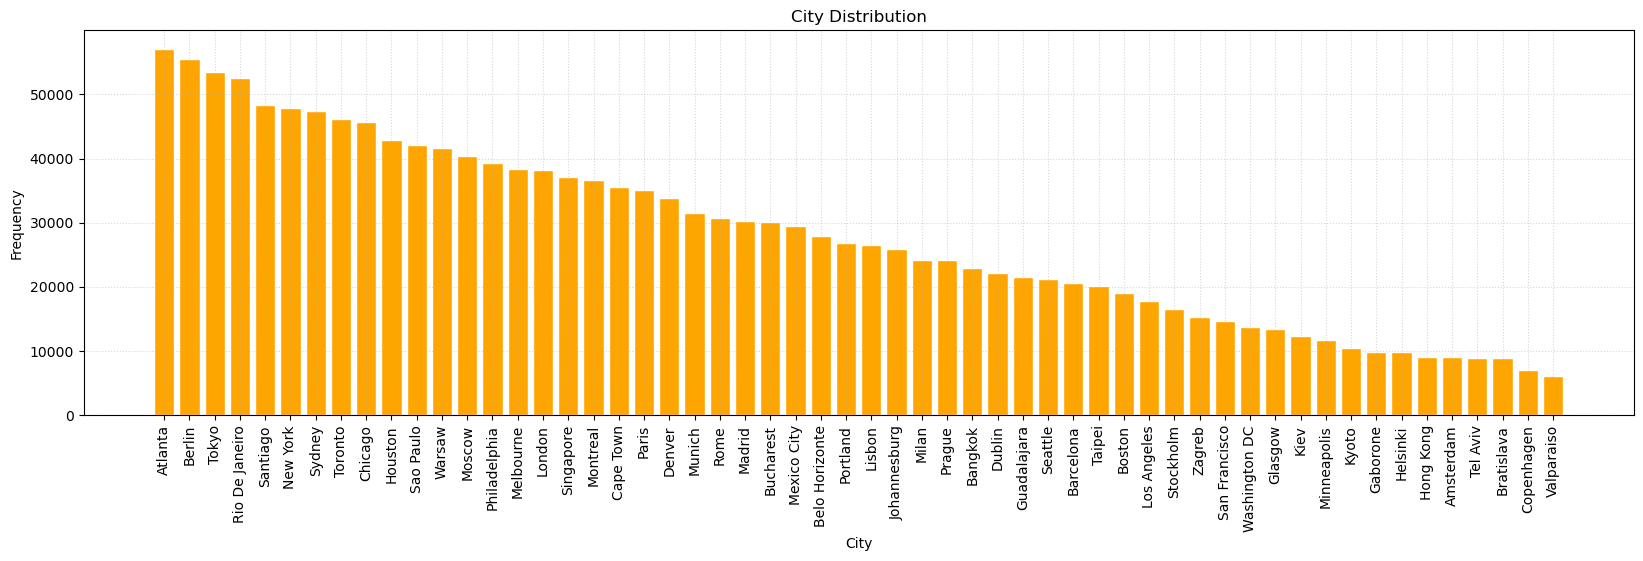

In [10]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1,figsize = (20,5))
plt.bar(place_right_counts.index,place_right_counts.values,facecolor = 'orange',edgecolor = 'white')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.grid(True,linestyle = ':',alpha = 0.5)
for label in ax.get_xticklabels():
    label.set_rotation(90)
plt.show()

In [11]:
# 同时满足三个col的三个条件

In [12]:
Atlanta_Wealth_left = data[
    (data['place_name_left'] == 'Atlanta') & 
    (data['study_question'] == 'wealthier') &
    (data['choice'] == 'left')
]

In [13]:
Atlanta_Wealth_right = data[
    (data['place_name_right'] == 'Atlanta') &
    (data['study_question'] == 'wealthier') &
    (data['choice'] == 'right')
]

In [14]:
Atlanta_Wealth = pd.concat([Atlanta_Wealth_left, Atlanta_Wealth_right], ignore_index=True)
Atlanta_Wealth.head()

,Unnamed: 0,place_id_left,place_id_right,study_id,left,right,voter_uniqueid,choice,study_question,place_name_right,place_name_left,day,time,long_right,lat_right,long_left,lat_left
0,573894,50e734e9d7c3df413b000ebf,50e5ff26d7c3df413b000902,50f62cb7a84ea7c5fdd2e458,513d7d32fdc9f0358700713b,51409199fdc9f04926000541,9107339040ac42fb9de53c039a2c35b0,left,wealthier,Madrid,Atlanta,2013-09-23,16:18:09,40.472893,-3.675025,33.835181,-84.482206
1,573918,50e734e9d7c3df413b000ebf,50e5fdeed7c3df413b000899,50f62cb7a84ea7c5fdd2e458,513d9ef9fdc9f035870085b4,513e2122fdc9f0358700a3bc,b55b3f39feb1443a987a306ca74e5f7e,left,wealthier,London,Atlanta,2016-04-22,13:23:58,51.512408,-0.030364,33.880258,-84.339019
2,573922,50e734e9d7c3df413b000ebf,50f39092fdc9f065f000097d,50f62cb7a84ea7c5fdd2e458,513d9dc3fdc9f035870081b2,50f5e6fdfdc9f065f0006e98,230e57de17a6420f815f6e442e0f7d38,left,wealthier,Sao Paulo,Atlanta,2014-05-19,15:45:29,-23.567968,-46.586252,33.754230,-84.378092
3,574016,50e734e9d7c3df413b000ebf,50e700fdd7c3df413b000bdb,50f62cb7a84ea7c5fdd2e458,513d9f97fdc9f03587008793,5140b755fdc9f04926001991,039240696b874829b4353508649de7ff,left,wealthier,Zagreb,Atlanta,2013-07-29,15:04:35,45.814032,15.933212,33.873729,-84.277445
4,574031,50e734e9d7c3df413b000ebf,50e70a8cd7c3df413b000c72,50f62cb7a84ea7c5fdd2e458,513d7cc9fdc9f03587006fe6,513d9ab3fdc9f03587007793,fd3052ad956e46d2b0491cf02ce8ab0e,left,wealthier,New York,Atlanta,2016-02-08,11:58:04,40.745498,-73.948231,33.691367,-84.463491


In [15]:
print(len(Atlanta_Wealth),len(data))
ratio = len(Atlanta_Wealth)/len(data)
print(f'ratio is: {ratio}')

6221 1565723
ratio is: 0.0039732443094979124


In [16]:
def GetCityWealthierRatio(city):
    
    Wealth_left = data[
    (data['place_name_left'] == city) & 
    (data['study_question'] == 'wealthier') &
    (data['choice'] == 'left')]
    
    Wealth_right = data[
    (data['place_name_right'] == city) & 
    (data['study_question'] == 'wealthier') &
    (data['choice'] == 'right')]
    
    Wealth = pd.concat([Wealth_left,Wealth_right],ignore_index = True)
    
    ratio = len(Wealth)/len(data)

    return ratio

In [17]:
cities_left = data['place_name_left'].unique()
cities_right = data['place_name_right'].unique()
cities = pd.Series(list(cities_left) + list(cities_right)).drop_duplicates().reset_index(drop = True)
cities

0          Amsterdam
1          Barcelona
2     Belo Horizonte
3             Boston
4            Chicago
5             Denver
6          Hong Kong
7               Kiev
8              Kyoto
9             Lisbon
10            London
11            Madrid
12            Moscow
13             Paris
14              Rome
15     Washington DC
16            Zagreb
17          New York
18          Santiago
19        Valparaiso
20             Tokyo
21           Atlanta
22           Bangkok
23            Berlin
24        Bratislava
25         Bucharest
26         Cape Town
27        Copenhagen
28            Dublin
29          Gaborone
30           Glasgow
31       Guadalajara
32          Helsinki
33           Houston
34      Johannesburg
35       Los Angeles
36         Melbourne
37       Mexico City
38             Milan
39       Minneapolis
40          Montreal
41            Munich
42      Philadelphia
43          Portland
44            Prague
45    Rio De Janeiro
46     San Francisco
47         Sa

In [18]:
ratios = []
for city in cities:
    ratio = GetCityWealthierRatio(city)
    ratios.append(ratio)

这段代码 city_ratio_sorted = sorted(city_ratios, key = lambda x:x[1], reverse = True) 的主要功能是对 city_ratios 这个可迭代对象进行排序，并将排序后的结果存储在 city_ratio_sorted 中。

代码含义分析
sorted() 是 Python 的内置函数，用于对可迭代对象进行排序，它会返回一个新的已排序列表，而不会改变原有的可迭代对象。
city_ratios 是需要进行排序的可迭代对象，通常是列表、元组等。
key = lambda x:x[1] 是 sorted() 函数的一个参数，用于指定排序的规则。lambda 是 Python 中的匿名函数，这里 lambda x:x[1] 表示对于 city_ratios 中的每个元素 x，取其索引为 1 的元素作为排序的依据。
reverse = True 也是 sorted() 函数的一个参数，它表示按照降序进行排序。如果 reverse = False 或者不写该参数，则默认按照升序排序。

key = lambda x:x[1]：key 参数指定了排序的规则。这里使用了一个匿名函数（lambda 函数），lambda x:x[1] 表示对于 city_ratios 中的每个元素 x，取其索引为 1 的元素作为排序的依据。也就是说，排序是根据每个元素的第二个值来进行的。ratio

In [19]:
# 组合城市与 ratio （已经知道是对应顺序的了）
city_ratios = list(zip(cities,ratios))
city_ratio_sorted = sorted(city_ratios,key = lambda x:x[1],reverse = True)
city_ratio_sorted

[('Berlin', 0.003985379278454746),
 ('Atlanta', 0.0039732443094979124),
 ('Toronto', 0.003480820042881148),
 ('Sydney', 0.003441221723127271),
 ('Chicago', 0.0033275362244790424),
 ('New York', 0.0032936860479152444),
 ('Tokyo', 0.0032604745539281214),
 ('Singapore', 0.0030445998430118225),
 ('London', 0.0029743447595775244),
 ('Melbourne', 0.002802539146451831),
 ('Paris', 0.0026569195189698304),
 ('Warsaw', 0.002640313771976269),
 ('Moscow', 0.002506829113451102),
 ('Montreal', 0.002396337027686251),
 ('Santiago', 0.0023254432616752773),
 ('Munich', 0.002306282784375014),
 ('Philadelphia', 0.0022832902116146983),
 ('Houston', 0.0022660457820444613),
 ('Denver', 0.002218783271370479),
 ('Cape Town', 0.0019064674913761885),
 ('Rome', 0.0018004461836480655),
 ('Madrid', 0.0017851178018078548),
 ('Rio De Janeiro', 0.0017812857063478022),
 ('Portland', 0.0017774536108877497),
 ('Sao Paulo', 0.0017429647517472758),
 ('Dublin', 0.001679096494079732),
 ('Prague', 0.001586487520461793),
 ('Se

*用于解开元组包

In [20]:
sorted_cities,sorted_ratios = zip(*city_ratio_sorted)

In [21]:
sorted_cities

('Berlin',
 'Atlanta',
 'Toronto',
 'Sydney',
 'Chicago',
 'New York',
 'Tokyo',
 'Singapore',
 'London',
 'Melbourne',
 'Paris',
 'Warsaw',
 'Moscow',
 'Montreal',
 'Santiago',
 'Munich',
 'Philadelphia',
 'Houston',
 'Denver',
 'Cape Town',
 'Rome',
 'Madrid',
 'Rio De Janeiro',
 'Portland',
 'Sao Paulo',
 'Dublin',
 'Prague',
 'Seattle',
 'Milan',
 'Johannesburg',
 'Boston',
 'Bucharest',
 'Lisbon',
 'Barcelona',
 'Mexico City',
 'Stockholm',
 'Washington DC',
 'Los Angeles',
 'San Francisco',
 'Taipei',
 'Bangkok',
 'Belo Horizonte',
 'Guadalajara',
 'Glasgow',
 'Minneapolis',
 'Zagreb',
 'Helsinki',
 'Amsterdam',
 'Hong Kong',
 'Kiev',
 'Tel Aviv',
 'Kyoto',
 'Copenhagen',
 'Bratislava',
 'Gaborone',
 'Valparaiso')